In [1]:
import numpy as np
import pandas as pd
import Utils
#
# LOOK HERE! 
# This cell must run first to setup the working environment
#

#load the config file
Utils.load_config('config_NA_c8.json')
Utils.print_parameters()

Below are the parameters in use. Check the parameters carefully to ensure a sucussful run.
{ 'agegrid_url': 'https://www.earthbyte.org/webdav/ftp/Data_Collections/Muller_etal_2016_AREPS/Muller_etal_2016_AREPS_Agegrids/Muller_etal_2016_AREPS_Agegrids_v1.17/Muller_etal_2016_AREPS_v1.17_netCDF/Muller_etal_2016_AREPS_v1.17_AgeGrid-{}.nc',
  'anchor_plate_id': 0,
  'case_name': 'case_AREPS',
  'coastlines': '../data/Global_EarthByte_230-0Ma_GK07_AREPS_Coastlines.gpmlz',
  'convergence_data_dir': './convergence_data/AREPS/',
  'convergence_data_filename_ext': 'csv',
  'convergence_data_filename_prefix': 'subStats',
  'coreg_input_dir': 'case_AREPS/coreg_input/NA_c8',
  'coreg_input_files': [ 'deposit_candidates.csv',
                         'negative_deposits.csv',
                         'positive_deposits.csv'],
  'coreg_output_dir': 'coreg_output',
  'feature_names': [ 'conv_rate',
                     'dist_nearest_edge',
                     'conv_paral_abs',
                     'sub

Nearest Neighbors


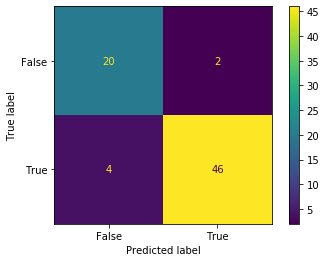

Use the train dataset to train the model and predict on the test dataset.
The bar chart indicates the model's prediction of deposit probabilities.
Score with train and test data: 0.92


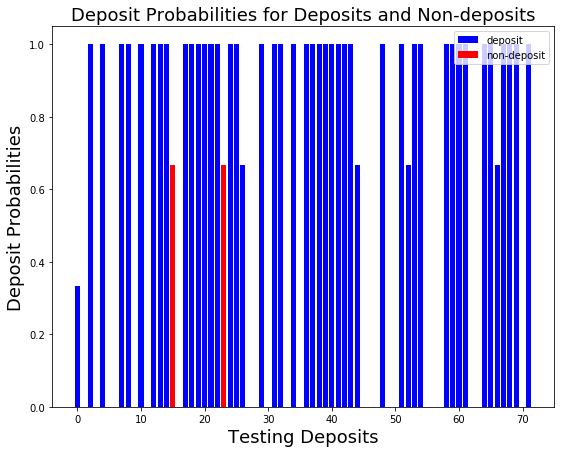

The bar chart shows the model's prediction of deposit probabilities and 
the colors show the correct prediction, false positive and false negative predictions.


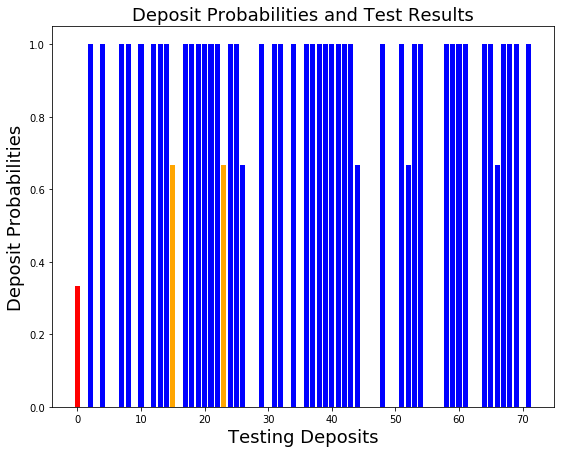

Linear SVM


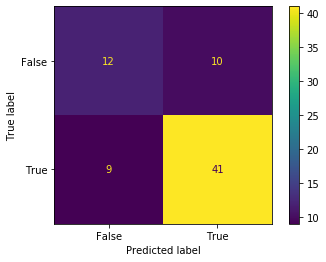

Use the train dataset to train the model and predict on the test dataset.
The bar chart indicates the model's prediction of deposit probabilities.
Score with train and test data: 0.74


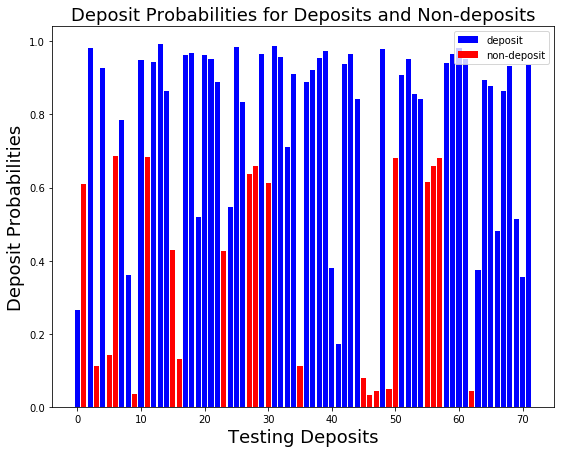

The bar chart shows the model's prediction of deposit probabilities and 
the colors show the correct prediction, false positive and false negative predictions.


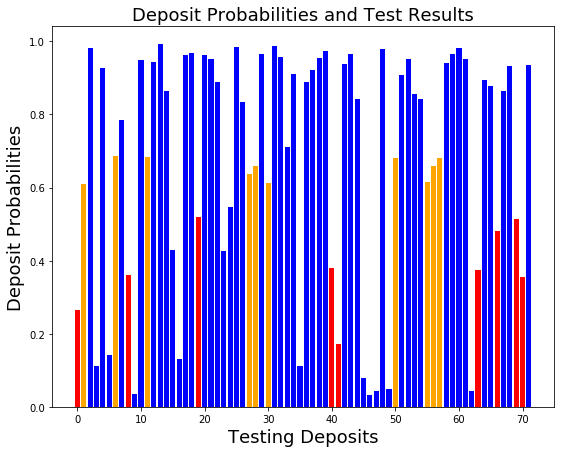

RBF SVM


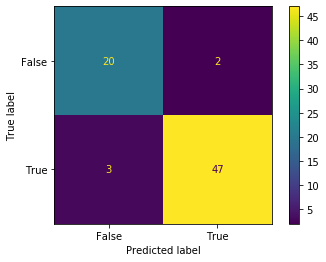

Use the train dataset to train the model and predict on the test dataset.
The bar chart indicates the model's prediction of deposit probabilities.
Score with train and test data: 0.93


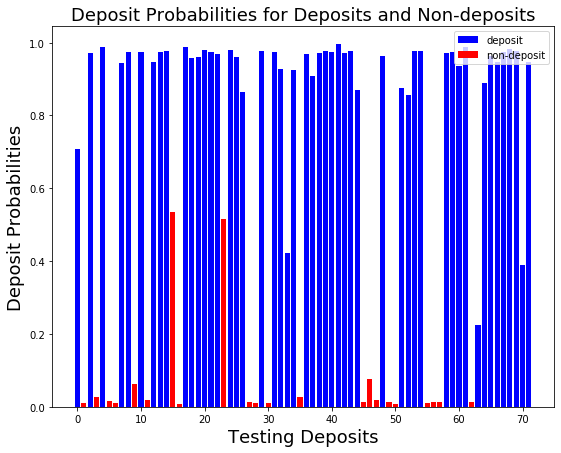

The bar chart shows the model's prediction of deposit probabilities and 
the colors show the correct prediction, false positive and false negative predictions.


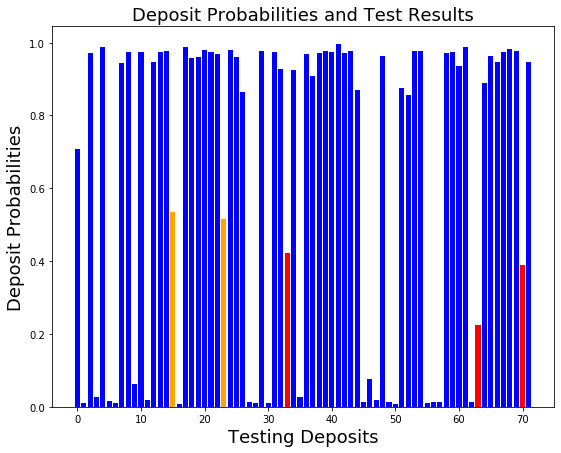

Gaussian Process


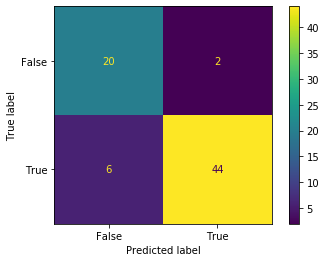

Use the train dataset to train the model and predict on the test dataset.
The bar chart indicates the model's prediction of deposit probabilities.
Score with train and test data: 0.89


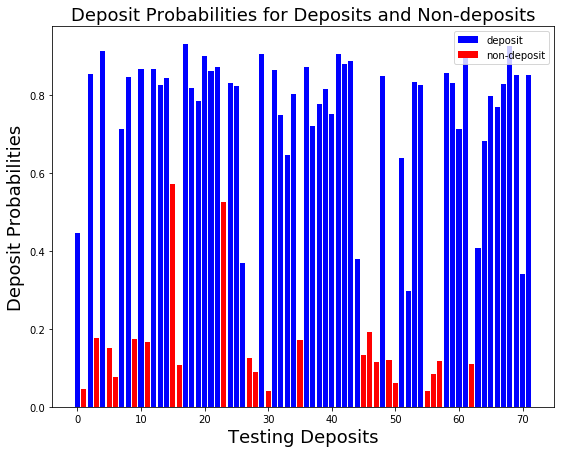

The bar chart shows the model's prediction of deposit probabilities and 
the colors show the correct prediction, false positive and false negative predictions.


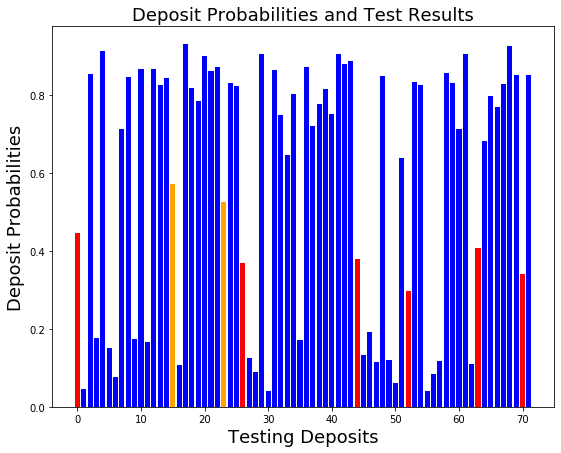

Decision Tree


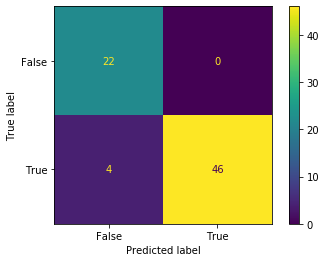

Use the train dataset to train the model and predict on the test dataset.
The bar chart indicates the model's prediction of deposit probabilities.
Score with train and test data: 0.94


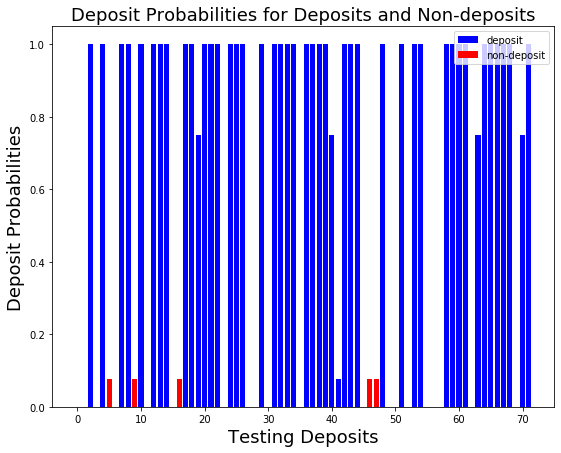

The bar chart shows the model's prediction of deposit probabilities and 
the colors show the correct prediction, false positive and false negative predictions.


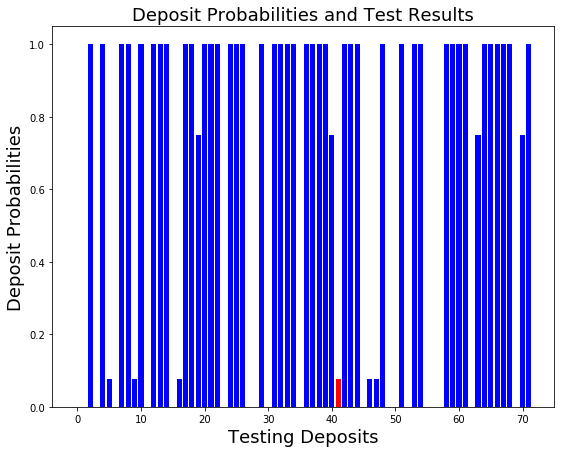

Random Forest


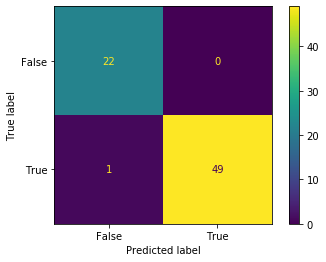

Use the train dataset to train the model and predict on the test dataset.
The bar chart indicates the model's prediction of deposit probabilities.
Score with train and test data: 0.99


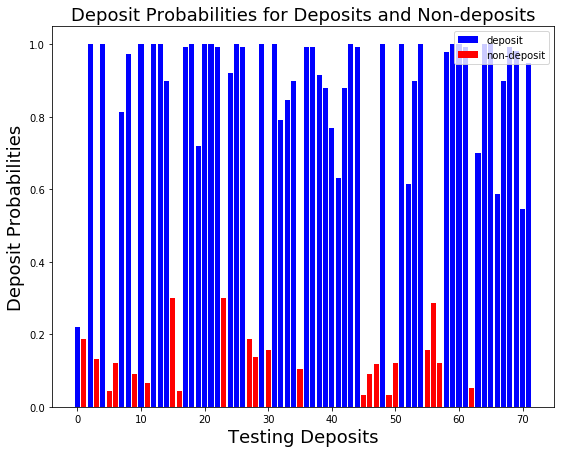

The bar chart shows the model's prediction of deposit probabilities and 
the colors show the correct prediction, false positive and false negative predictions.


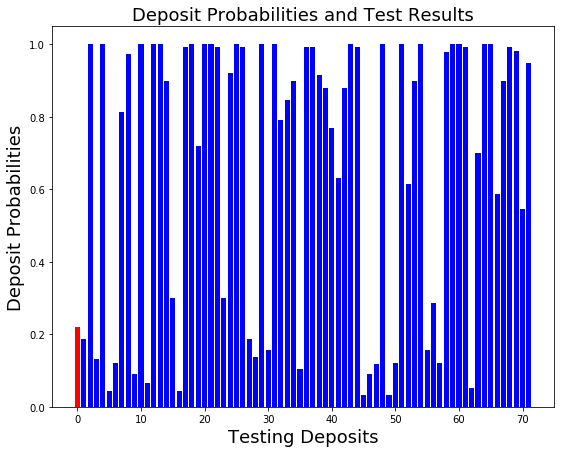

Neural Net


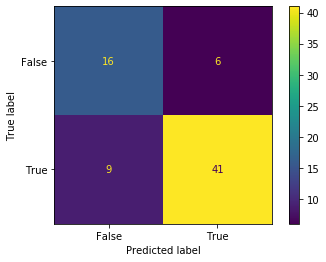

Use the train dataset to train the model and predict on the test dataset.
The bar chart indicates the model's prediction of deposit probabilities.
Score with train and test data: 0.79


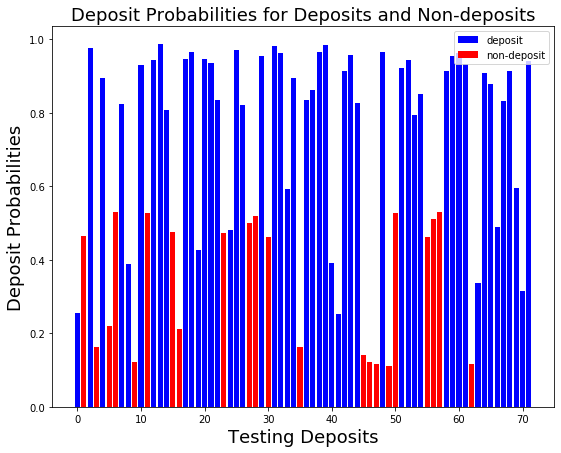

The bar chart shows the model's prediction of deposit probabilities and 
the colors show the correct prediction, false positive and false negative predictions.


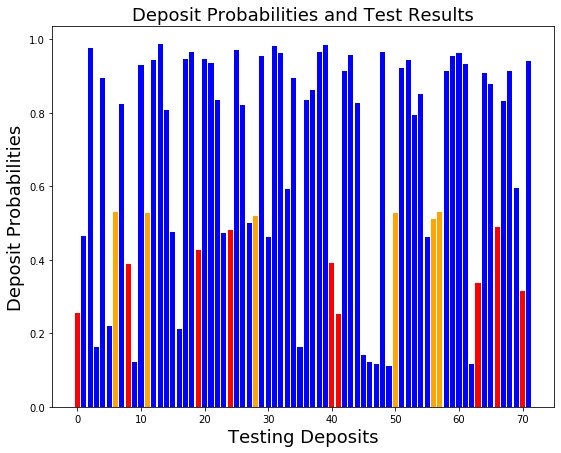

AdaBoost


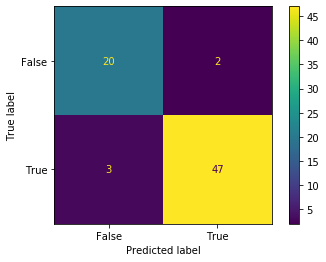

Use the train dataset to train the model and predict on the test dataset.
The bar chart indicates the model's prediction of deposit probabilities.
Score with train and test data: 0.93


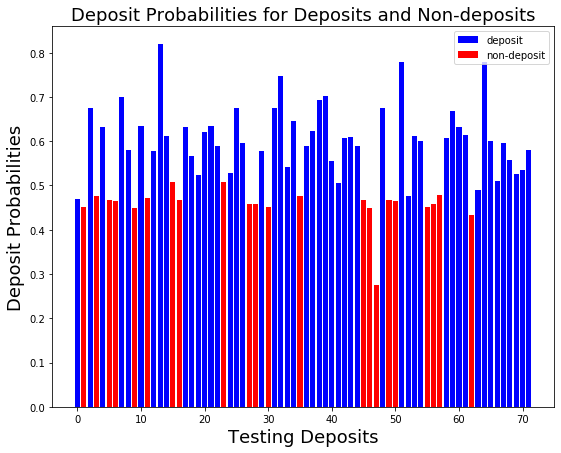

The bar chart shows the model's prediction of deposit probabilities and 
the colors show the correct prediction, false positive and false negative predictions.


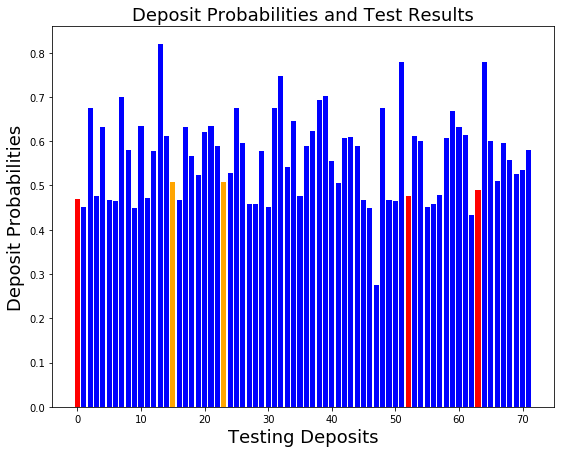

Naive Bayes


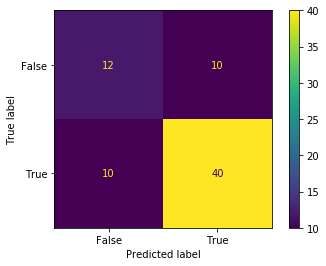

Use the train dataset to train the model and predict on the test dataset.
The bar chart indicates the model's prediction of deposit probabilities.
Score with train and test data: 0.72


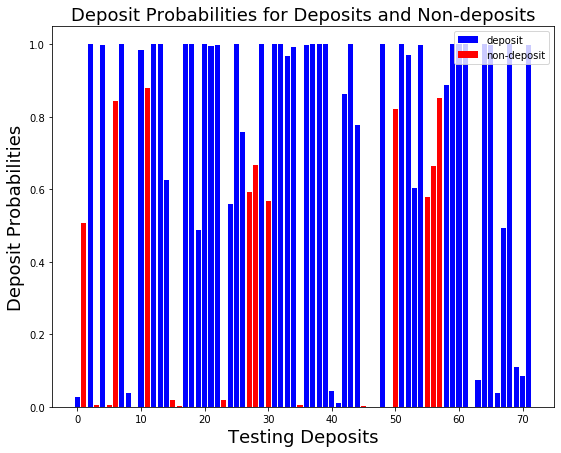

The bar chart shows the model's prediction of deposit probabilities and 
the colors show the correct prediction, false positive and false negative predictions.


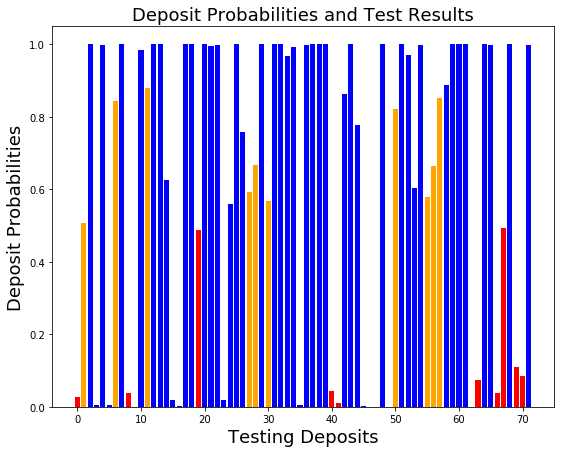

QDA


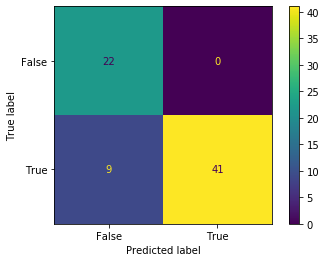

Use the train dataset to train the model and predict on the test dataset.
The bar chart indicates the model's prediction of deposit probabilities.
Score with train and test data: 0.88


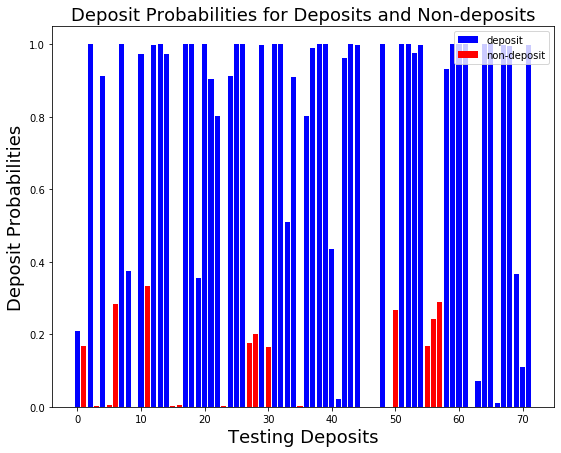

The bar chart shows the model's prediction of deposit probabilities and 
the colors show the correct prediction, false positive and false negative predictions.


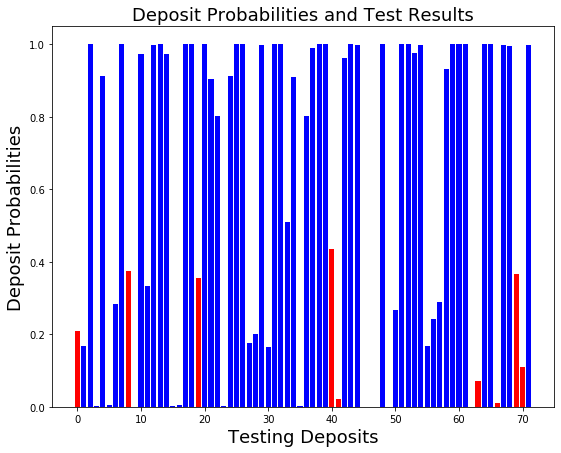

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
import pandas as pd
from parameters import parameters 
import Utils as Utils

# h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, probability=True),
    SVC(gamma=2, C=1, probability=True),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

positive = pd.read_csv(Utils.get_ml_input_dir() + 'NA_positive_deposits.csv')
negative = pd.read_csv(Utils.get_ml_input_dir() + 'NA_negative_deposits.csv')

train_test_data = pd.concat([positive, negative])

labels = train_test_data.iloc[:,-1]
data = train_test_data.iloc[:,:-1]
data = preprocessing.scale(data)

train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.25, random_state=42)


for name, clf in zip(names, classifiers):
    print(name)
    clf.fit(train_data, train_labels)
    score = clf.score(test_data, test_labels)
    plot_confusion_matrix(clf, test_data, test_labels)
    plt.show()
    print('Use the train dataset to train the model and predict on the test dataset.')
    print('The bar chart indicates the model\'s prediction of deposit probabilities.')
    print(f'Score with train and test data: {round(score,2)}')

    proba=clf.predict_proba(test_data)
    predict_labels=clf.predict(test_data)
    all_weights = []

    #plot the probabilities
    fig, ax = plt.subplots(figsize=(9, 7))
    tmp = np.c_[np.arange(len(proba)), test_labels, proba]
    deposit = tmp[tmp[:,1]==1]
    non_deposit = tmp[tmp[:,1]==0]
    ax.bar(deposit[:,0], deposit[:,3], color='blue', label='deposit')
    ax.bar(non_deposit[:,0], non_deposit[:,3], color='red', label='non-deposit')
    ax.set_ylabel('Deposit Probabilities', fontsize=18)
    ax.set_xlabel('Testing Deposits', fontsize=18)
    ax.set_title('Deposit Probabilities for Deposits and Non-deposits',fontsize=18)
    plt.legend(loc='upper right')
    plt.show()

    print('The bar chart shows the model\'s prediction of deposit probabilities and ')
    print('the colors show the correct prediction, false positive and false negative predictions.')
    #plot the probabilities with true, false positive and false negative
    fig, ax = plt.subplots(figsize=(9, 7))
    tmp = np.c_[np.arange(len(proba)), predict_labels, test_labels, proba]
    correct_predict = tmp[tmp[:,1]==tmp[:,2]]
    tmp=tmp[tmp[:,1]!=tmp[:,2]]
    false_positive = tmp[tmp[:,1]==1]
    false_negative = tmp[tmp[:,1]==0]
    ax.bar(correct_predict[:,0], correct_predict[:,4], color='blue', label='correct')
    ax.bar(false_positive[:,0], false_positive[:,4], color='orange', label='false positive')
    ax.bar(false_negative[:,0], false_negative[:,4], color='red', label='false negative')
    ax.set_ylabel('Deposit Probabilities', fontsize=18)
    ax.set_xlabel('Testing Deposits', fontsize=18)
    ax.set_title('Deposit Probabilities and Test Results',fontsize=18)
    #plt.legend(loc='upper right')
    plt.show()
    
#     fig, ax = plt.subplots(figsize=(10, 5))
#     ax.barh(np.arange(len(clf.feature_importances_)), clf.feature_importances_)
#     ax.set_xlabel('Importance', fontsize=18)
#     ax.set_title('Feature Importance',fontsize=18)
#     ax.set_yticks(np.arange(len(clf.feature_importances_)))
#     #feature_names = ['Seafloor Age', 'Distance Along Trench', 'Trench Absolute Orthogonal',
#     #                'Convergence Orthogonal Velocity', 'Convergence Parallel Velocity']
#     feature_names = train_test_data.columns[:-1]
#     print(feature_names)
#     ax.set_yticklabels(feature_names, rotation=0, fontsize=18)
#     ax.invert_yaxis() 
#     plt.show()



Nearest Neighbors


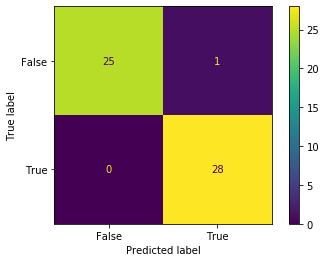

Use the train dataset to train the model and predict on the test dataset.
The bar chart indicates the model's prediction of deposit probabilities.
Score with train and test data: 0.98


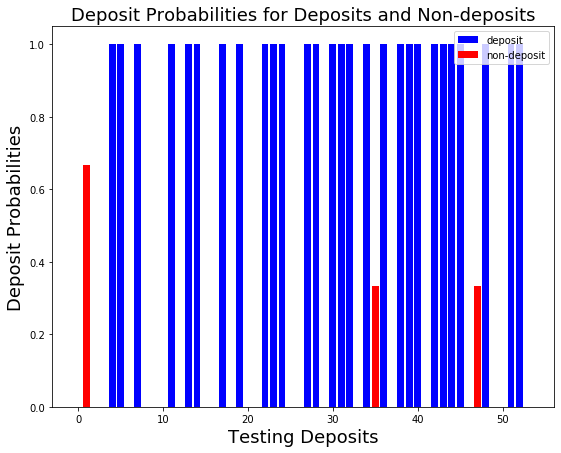

The bar chart shows the model's prediction of deposit probabilities and 
the colors show the correct prediction, false positive and false negative predictions.


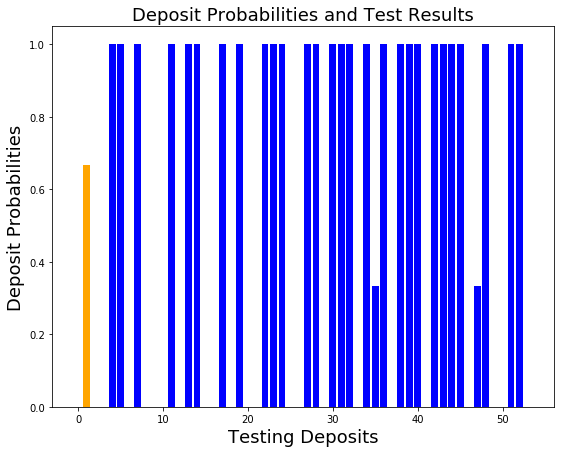

Linear SVM


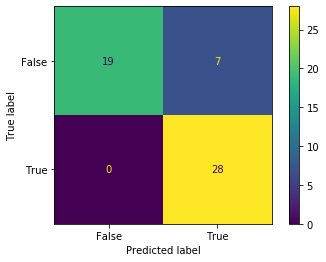

Use the train dataset to train the model and predict on the test dataset.
The bar chart indicates the model's prediction of deposit probabilities.
Score with train and test data: 0.87


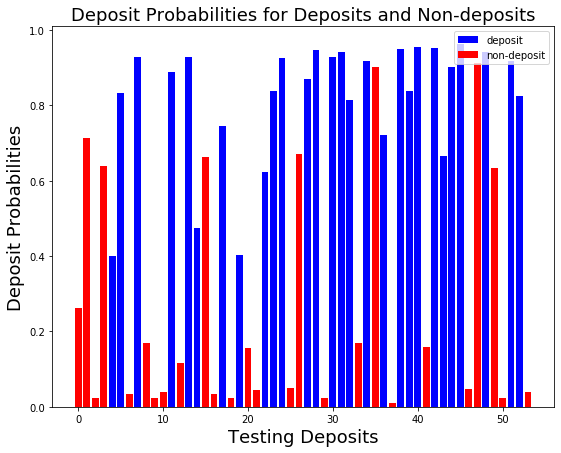

The bar chart shows the model's prediction of deposit probabilities and 
the colors show the correct prediction, false positive and false negative predictions.


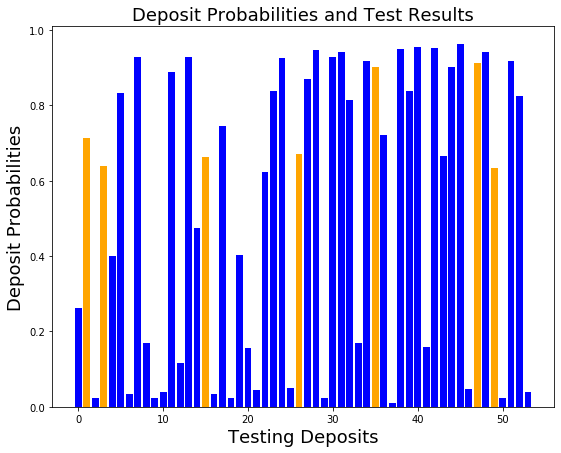

RBF SVM


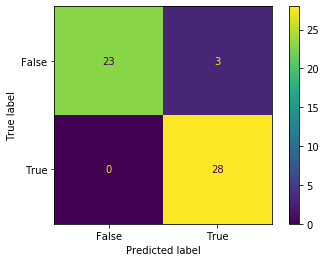

Use the train dataset to train the model and predict on the test dataset.
The bar chart indicates the model's prediction of deposit probabilities.
Score with train and test data: 0.94


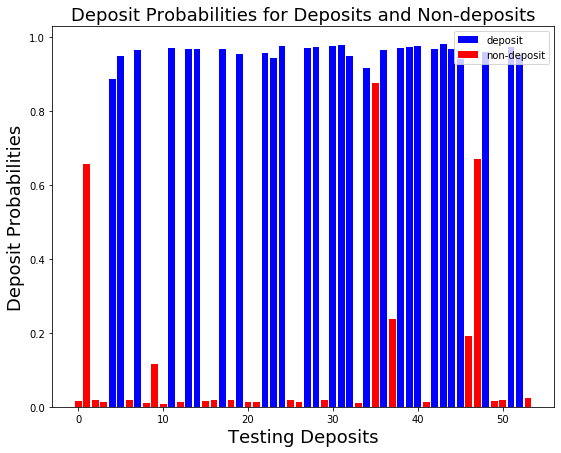

The bar chart shows the model's prediction of deposit probabilities and 
the colors show the correct prediction, false positive and false negative predictions.


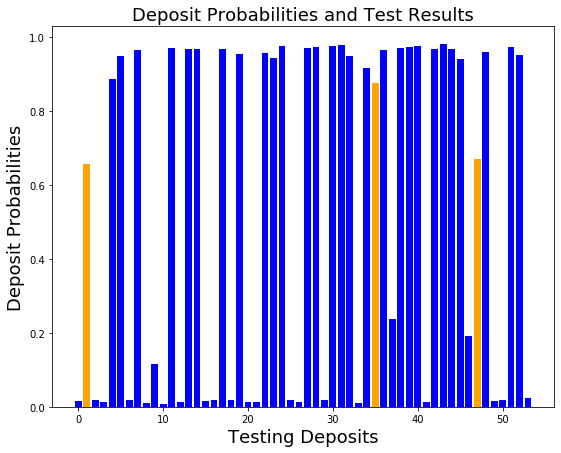

Gaussian Process


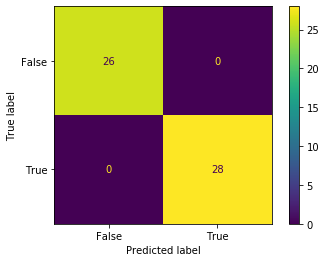

Use the train dataset to train the model and predict on the test dataset.
The bar chart indicates the model's prediction of deposit probabilities.
Score with train and test data: 1.0


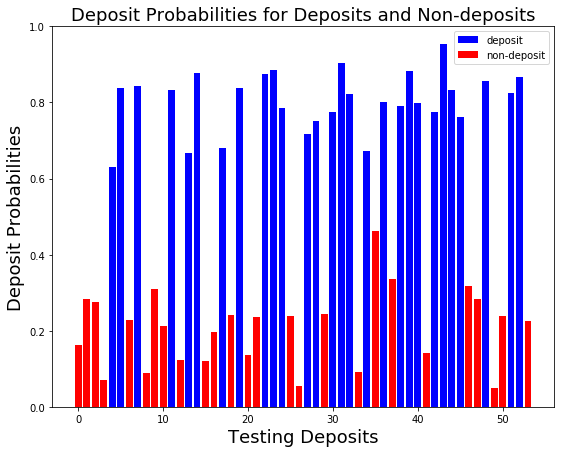

The bar chart shows the model's prediction of deposit probabilities and 
the colors show the correct prediction, false positive and false negative predictions.


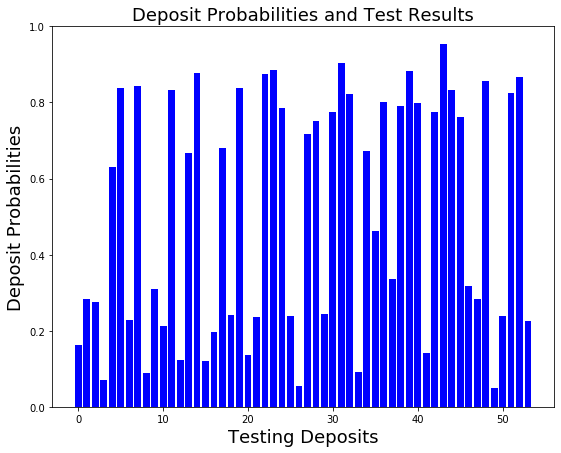

Decision Tree


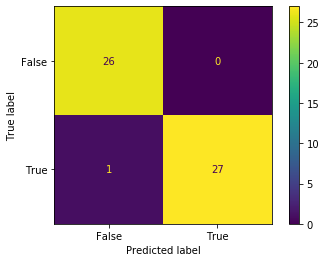

Use the train dataset to train the model and predict on the test dataset.
The bar chart indicates the model's prediction of deposit probabilities.
Score with train and test data: 0.98


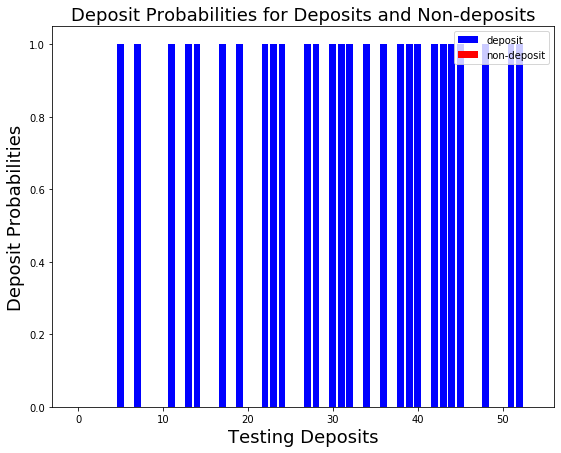

The bar chart shows the model's prediction of deposit probabilities and 
the colors show the correct prediction, false positive and false negative predictions.


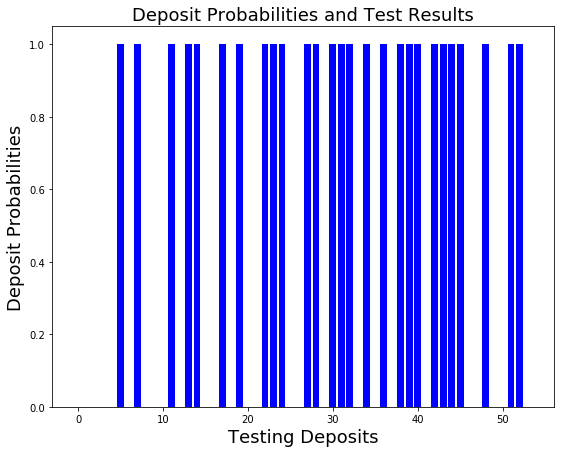

Random Forest


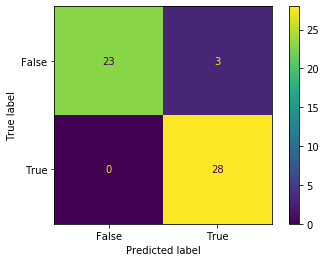

Use the train dataset to train the model and predict on the test dataset.
The bar chart indicates the model's prediction of deposit probabilities.
Score with train and test data: 0.94


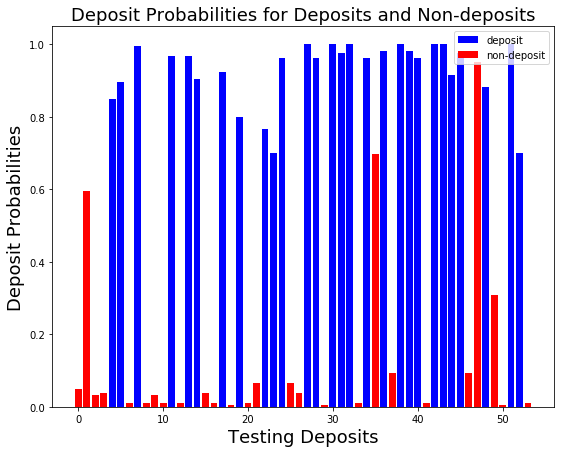

The bar chart shows the model's prediction of deposit probabilities and 
the colors show the correct prediction, false positive and false negative predictions.


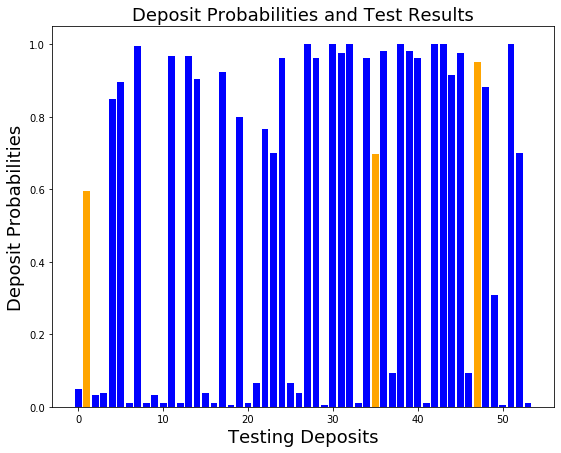

Neural Net


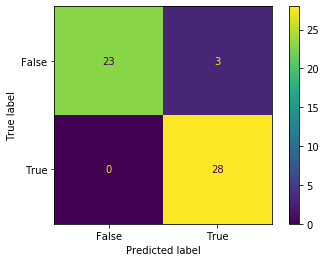

Use the train dataset to train the model and predict on the test dataset.
The bar chart indicates the model's prediction of deposit probabilities.
Score with train and test data: 0.94


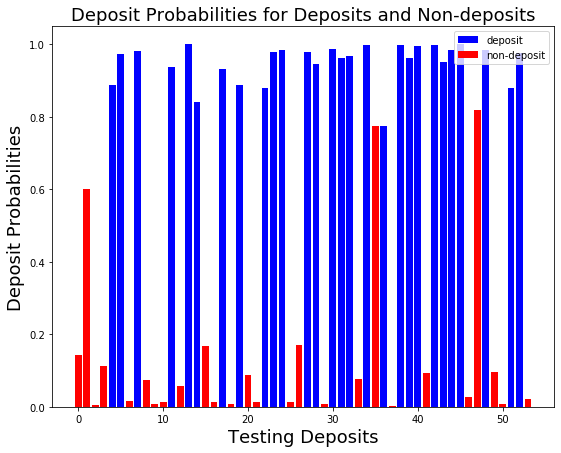

The bar chart shows the model's prediction of deposit probabilities and 
the colors show the correct prediction, false positive and false negative predictions.


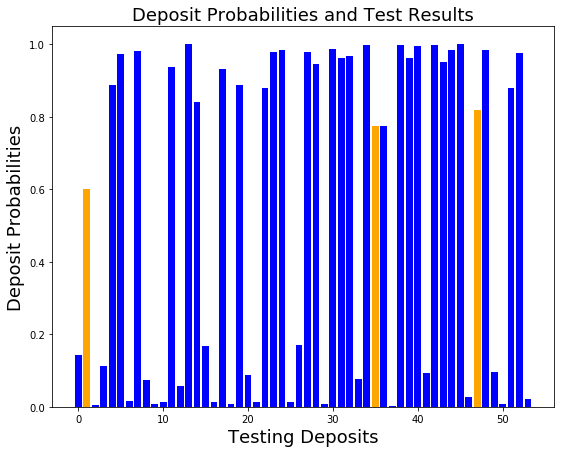

AdaBoost


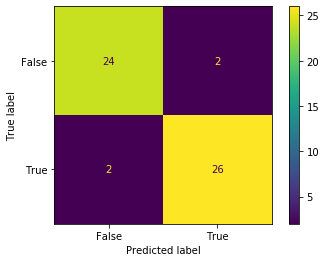

Use the train dataset to train the model and predict on the test dataset.
The bar chart indicates the model's prediction of deposit probabilities.
Score with train and test data: 0.93


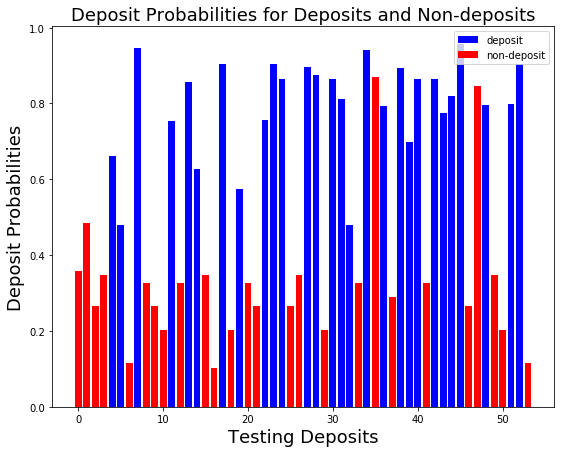

The bar chart shows the model's prediction of deposit probabilities and 
the colors show the correct prediction, false positive and false negative predictions.


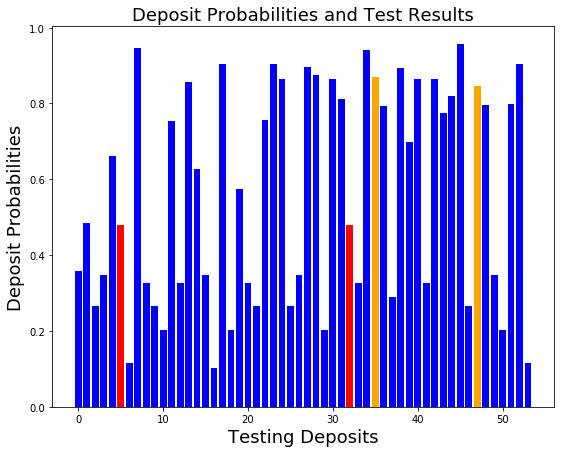

Naive Bayes


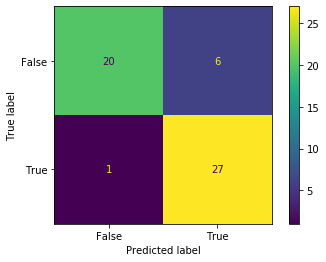

Use the train dataset to train the model and predict on the test dataset.
The bar chart indicates the model's prediction of deposit probabilities.
Score with train and test data: 0.87


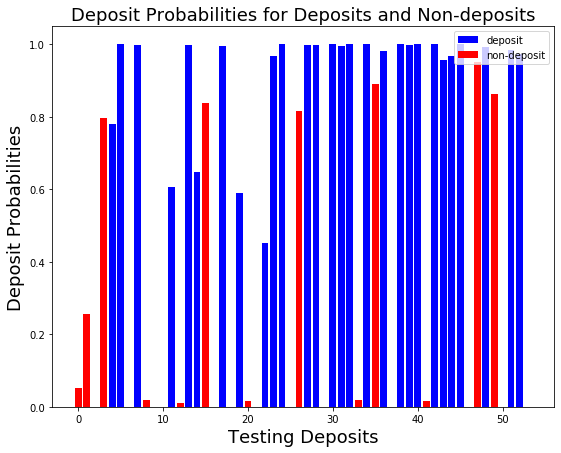

The bar chart shows the model's prediction of deposit probabilities and 
the colors show the correct prediction, false positive and false negative predictions.


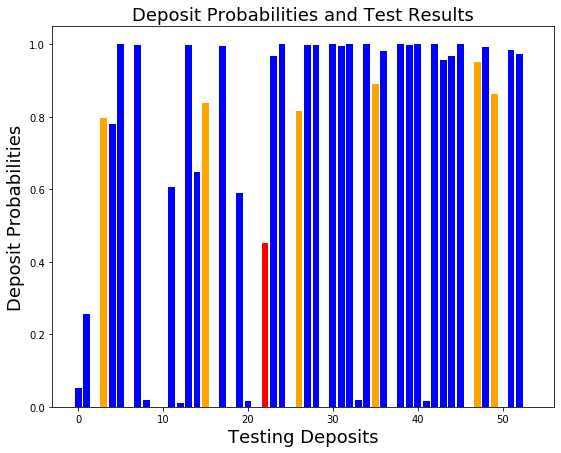

QDA


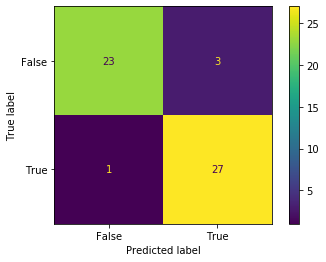

Use the train dataset to train the model and predict on the test dataset.
The bar chart indicates the model's prediction of deposit probabilities.
Score with train and test data: 0.93


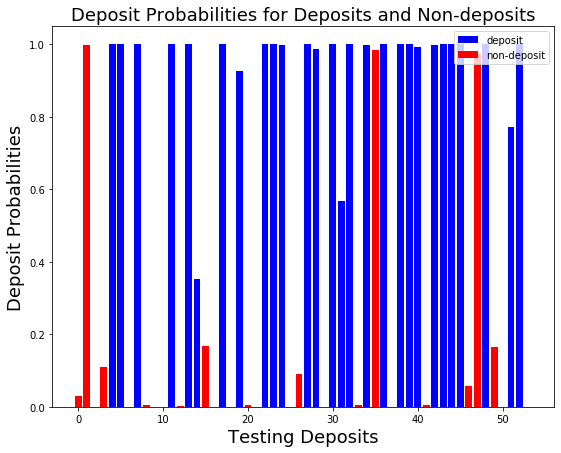

The bar chart shows the model's prediction of deposit probabilities and 
the colors show the correct prediction, false positive and false negative predictions.


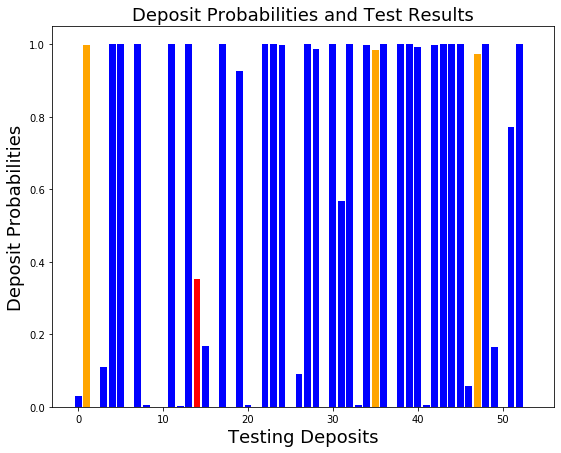

In [3]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, probability=True),
    SVC(gamma=2, C=1, probability=True),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

positive = pd.read_csv(Utils.get_ml_input_dir() + 'SA_positive_deposits.csv')
negative = pd.read_csv(Utils.get_ml_input_dir() + 'SA_negative_deposits.csv')

train_test_data = pd.concat([positive, negative])

labels = train_test_data.iloc[:,-1]
data = train_test_data.iloc[:,:-1]
data = preprocessing.scale(data)

train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.25, random_state=42)


for name, clf in zip(names, classifiers):
    print(name)
    clf.fit(train_data, train_labels)
    score = clf.score(test_data, test_labels)
    plot_confusion_matrix(clf, test_data, test_labels)
    plt.show()
    print('Use the train dataset to train the model and predict on the test dataset.')
    print('The bar chart indicates the model\'s prediction of deposit probabilities.')
    print(f'Score with train and test data: {round(score,2)}')

    proba=clf.predict_proba(test_data)
    predict_labels=clf.predict(test_data)
    all_weights = []

    #plot the probabilities
    fig, ax = plt.subplots(figsize=(9, 7))
    tmp = np.c_[np.arange(len(proba)), test_labels, proba]
    deposit = tmp[tmp[:,1]==1]
    non_deposit = tmp[tmp[:,1]==0]
    ax.bar(deposit[:,0], deposit[:,3], color='blue', label='deposit')
    ax.bar(non_deposit[:,0], non_deposit[:,3], color='red', label='non-deposit')
    ax.set_ylabel('Deposit Probabilities', fontsize=18)
    ax.set_xlabel('Testing Deposits', fontsize=18)
    ax.set_title('Deposit Probabilities for Deposits and Non-deposits',fontsize=18)
    plt.legend(loc='upper right')
    plt.show()

    print('The bar chart shows the model\'s prediction of deposit probabilities and ')
    print('the colors show the correct prediction, false positive and false negative predictions.')
    #plot the probabilities with true, false positive and false negative
    fig, ax = plt.subplots(figsize=(9, 7))
    tmp = np.c_[np.arange(len(proba)), predict_labels, test_labels, proba]
    correct_predict = tmp[tmp[:,1]==tmp[:,2]]
    tmp=tmp[tmp[:,1]!=tmp[:,2]]
    false_positive = tmp[tmp[:,1]==1]
    false_negative = tmp[tmp[:,1]==0]
    ax.bar(correct_predict[:,0], correct_predict[:,4], color='blue', label='correct')
    ax.bar(false_positive[:,0], false_positive[:,4], color='orange', label='false positive')
    ax.bar(false_negative[:,0], false_negative[:,4], color='red', label='false negative')
    ax.set_ylabel('Deposit Probabilities', fontsize=18)
    ax.set_xlabel('Testing Deposits', fontsize=18)
    ax.set_title('Deposit Probabilities and Test Results',fontsize=18)
    #plt.legend(loc='upper right')
    plt.show()
    
#     fig, ax = plt.subplots(figsize=(10, 5))
#     ax.barh(np.arange(len(clf.feature_importances_)), clf.feature_importances_)
#     ax.set_xlabel('Importance', fontsize=18)
#     ax.set_title('Feature Importance',fontsize=18)
#     ax.set_yticks(np.arange(len(clf.feature_importances_)))
#     #feature_names = ['Seafloor Age', 'Distance Along Trench', 'Trench Absolute Orthogonal',
#     #                'Convergence Orthogonal Velocity', 'Convergence Parallel Velocity']
#     feature_names = train_test_data.columns[:-1]
#     print(feature_names)
#     ax.set_yticklabels(feature_names, rotation=0, fontsize=18)
#     ax.invert_yaxis() 
#     plt.show()

